In [500]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [501]:
import numpy as np
from chainconsumer import ChainConsumer
#from corner import corner

In [502]:
! ls -lt /u/ki/swmclau2/des/PearceMCMC/*chain*cosmo*.npy

-rw-r--r-- 1 swmclau2 des  239976034 Nov  4 21:11 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat_newhp2_fixedHOD.npy
-rw-r--r-- 1 swmclau2 des   15594063 Nov  4 21:10 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_rf.npy
-rw-r--r-- 1 swmclau2 des  120060063 Nov  4 19:47 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat_newhp2.npy
-rw-r--r-- 1 swmclau2 des   61776034 Nov  4 17:01 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat_newhp_fixedHOD.npy
-rw-r--r-- 1 swmclau2 des  211830063 Nov  4 15:58 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat_newhp.npy
-rw-r--r-- 1 swmclau2 des 1380000063 Nov  2 19:15 /u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat.npy
-rw-r--r-- 1 swmclau2 des   13800063 Nov  2 15:34 /u/ki/swmclau2/des/PearceMCMC/500_walkers_100_steps_chain_cosmo_zheng_xi_lowmsat.npy
-rw-

In [503]:
! du /u/ki/swmclau2/des/PearceMCMC/*chain*cosmo*.npy -sh

2.6G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi.npy
2.6G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi_2.npy
2.6G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi_3.npy
987M	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_20000_steps_chain_cosmo_zheng_xi_fixed_cosmo.npy
3.2G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_20000_steps_chain_cosmo_zheng_xi_newhp.npy
7.7G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_50000_steps_chain_cosmo_zheng_xi.npy
4.0K	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_50000_steps_chain_cosmo_zheng_xi_rf.npy
27M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_cosmo_zheng_xi.npy
2.7M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_100_steps_chain_cosmo_zheng_xi.npy
4.2M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_cosmo.npy
23M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_hod.npy
264M	/u/ki/swmclau2/des/Pearc

In [504]:
#fname = 'ab_sham_chain.npy'
#fname = '/u/ki/swmclau2/des/PearceMCMC/chain.npy'
fname = '/u/ki/swmclau2/des/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat_newhp2_fixedHOD.npy'

In [505]:
chain = np.genfromtxt(fname)

In [506]:
chain.shape

(1367500, 7)

In [507]:
chain

array([[ 3.29334434e+00,  6.77074100e+01, -1.17772857e+00, ...,
         3.05175564e+00,  9.76907747e-01,  2.22568191e-02],
       [ 3.41862894e+00,  6.53006396e+01, -8.50856492e-01, ...,
         3.09462369e+00,  9.61101682e-01,  2.19029271e-02],
       [ 3.58279856e+00,  6.87758268e+01, -1.15311987e+00, ...,
         3.00724388e+00,  9.62447634e-01,  2.22027395e-02],
       ...,
       [ 2.62125013e+00,  6.27273381e+01, -1.21554199e+00, ...,
         3.15234944e+00,  9.27846203e-01,  2.24509688e-02],
       [ 2.62125014e+00,  6.27272122e+01, -1.21554277e+00, ...,
         3.15235266e+00,  9.27846202e-01,  2.24509688e-02],
       [ 2.62125023e+00,  6.27272093e+01, -1.21554139e+00, ...,
         3.15235481e+00,  9.27846201e-01,  2.24509691e-02]])

In [508]:
n_walkers = 500
n_params = chain.shape[1]

In [509]:
#c = chain.reshape((n_walkers, -1, n_params))
n_burn = 2000
chain = chain[n_walkers*n_burn:, :]
#c = chain.reshape((-1, n_walkers, n_params))

#chain = c[:,:, :].reshape((-1, n_params))
print chain.shape, chain.shape[0]/n_walkers

(367500, 7) 735


In [510]:
MAP = chain.mean(axis = 0)
print MAP

[ 3.22763160e+00  6.46315838e+01 -1.23826643e+00  1.16912204e-01
  3.15924135e+00  9.30195239e-01  2.22549989e-02]


In [511]:
param_names = [r'$N_{eff}$', r'$\log(M_0)$',r'$\log(M_1)$', r'$H_0$',r'$w_0$', r'$\ln(10A_s)$',  r'$\Omega_c h^2$',
               r'$\sigma_{\log M }$', r'$\alpha$',  r'$n_s$', r'$\Omega_b h^2$']

In [512]:
hod_param_names = [r'$\sigma_{\log M }$', r'$\log(M_0)$',r'$\log(M_1)$',r'$\alpha$' ]
cosmo_param_names = [r'$N_{eff}$', r'$H_0$', r'$w_0$', r'$\Omega_c h^2$',r'$\ln(10A_s)$',r'$n_s$',r'$\Omega_b h^2$' ]

In [513]:
chain.shape

(367500, 7)

In [514]:
#fixed some params
#param_names = [r'$\log{M_{min}}$',r'$\sigma_{log{M}}$',r'$\log{M_1}$', r'$\alpha$']#, r'$\log{M_0}$', r'$\log{M_1}$', r'$\alpha$']

In [515]:
c = ChainConsumer()
c.add_chain(chain, walkers=n_walkers, parameters = cosmo_param_names)
c.configure(statistics='cumulative')

In [516]:
#true_vals = np.array([12.9390382,12.51024343,  14.36144524,   0.73766725,  1.06822384])
#true_vals = np.array([12.9390382,0.0, 12.51024343,  14.36144524, 0.0,  0.73766725,  1.06822384])

In [517]:
from pearce.mocks import cat_dict
cosmo_params = {'simname':'testbox', 'boxno': 3, 'realization':0, 'scale_factors':[1.0], 'system': 'long'}
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [518]:
cpv = cat._get_cosmo_param_names_vals()

print  {key: val for key, val in zip(cpv[0], cpv[1])}

{'Neff': 3.7, 'H0': 70.7317, 'w0': -1.13151, 'omch2': 0.12283, 'ln10As': 3.11395, 'ns': 0.953515, 'ombh2': 0.0217629}


In [519]:
cosmo_true_vals = [3.7,70.7317,-1.13151, 0.12283,3.11395, 0.953515,  0.021762]

In [520]:
emulation_point = [('logM0', 14.0), ('sigma_logM', 0.2),
                    ('alpha', 1.083),('logM1', 13.7)]

In [521]:
hod_true_vals = [0.2, 14.0, 13.7, 1.083]

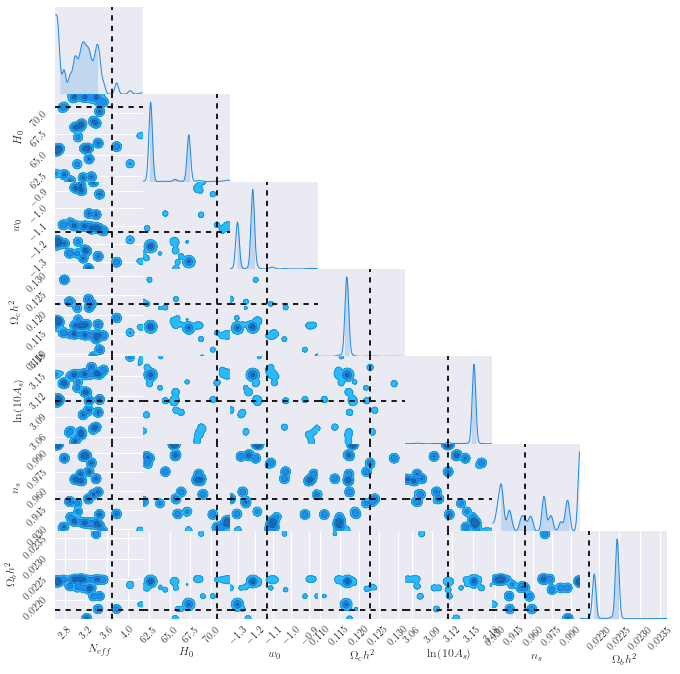

In [522]:
fig = c.plotter.plot(figsize=(10,10), parameters = cosmo_param_names, truth = cosmo_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

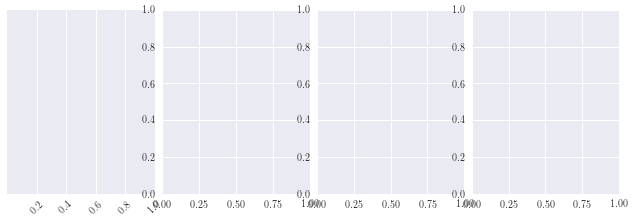

In [523]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 3) ,parameters = hod_param_names, truth = hod_true_vals)
fig.show()

In [ ]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 6) , parameters = cosmo_param_names, truth = cosmo_true_vals)
fig.show()

In [ ]:
gelman_rubin_converged = c.diagnostic.gelman_rubin()
print gelman_rubin_converged

In [ ]:
np.sqrt(np.diag(c.analysis.get_covariance()[1]))

In [ ]:
summary  = c.analysis.get_summary()
for key, val in summary.iteritems():
    print key, val[1]

In [ ]:
MAP = np.array([summary[p][1] for p in param_names])
print MAP

In [ ]:
print param_names